In [1]:
import sys
import spikeinterface as si
import matplotlib.pyplot as plt
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.widgets as sw
import spikeinterface.qualitymetrics as sqm
import json

import os
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import MEArec as mr
import pandas as pd

/home/ubuntu/.conda/envs/spike_sorting_jct/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
folder_list = os.listdir("/media/ubuntu/sda/Spike_Sorting/paper_architecture/02_simulation_data/01_Neuroxenus_32_channels/data_generation")
folder_list.remove("setting_1")
folder_list.remove("setting_2_neuron_num")
folder_list.remove("simulation_32channel.ipynb")
folder_list.remove("tmp_params_path.yaml")

In [11]:
# for folder in folder_list:
folder = 'setting_2_neuron_num'
file_list = os.listdir(f"/media/ubuntu/sda/Spike_Sorting/paper_architecture/02_simulation_data/01_Neuroxenus_32_channels/data_generation/{folder}/recordings")
os.makedirs(f"/media/ubuntu/sda/Spike_Sorting/paper_architecture/02_simulation_data/01_Neuroxenus_32_channels/data_generation/{folder}/spike_inf", exist_ok=True)
os.makedirs(f"/media/ubuntu/sda/Spike_Sorting/paper_architecture/02_simulation_data/01_Neuroxenus_32_channels/data_generation/{folder}/cluster_inf", exist_ok=True)

for file in file_list:
    recgen = mr.load_recordings(f'/media/ubuntu/sda/Spike_Sorting/paper_architecture/02_simulation_data/01_Neuroxenus_32_channels/data_generation/{folder}/recordings/{file}')
    file = file.split(".")[0]

    spike_inf = pd.DataFrame(columns= ['time', 'Neuron'])
    location = np.array(recgen.template_locations)
    for i in range(len(recgen.spiketrains)):
        temp_train = recgen.spiketrains[i]
        times = temp_train.times * 10000
        times = times.astype(int)
        temp_train = pd.DataFrame(times)
        temp_train.columns = ['time']
        temp_train['Neuron'] = f'Neuron_{i + 1}'
        temp_train['x'] = location[i, 1]
        temp_train['y'] = location[i, 0]

        spike_inf = pd.concat((spike_inf, temp_train), axis = 0)

    spike_inf.to_csv(f"/media/ubuntu/sda/Spike_Sorting/paper_architecture/02_simulation_data/01_Neuroxenus_32_channels/data_generation/{folder}/spike_inf/{file}_spike_inf.csv", index=False)

    cluster_inf = pd.DataFrame(columns= ['Neuron', 'x', 'y'])
    location = np.array(recgen.template_locations)
    for i in range(len(recgen.spiketrains)):
        temp_train = pd.DataFrame((f'Neuron_{i + 1}',location[i, 1], location[i, 2])).T
        temp_train.columns = ['Neuron', 'x', 'y']

        cluster_inf = pd.concat((cluster_inf, temp_train), axis = 0)

    cluster_inf.to_csv(f"/media/ubuntu/sda/Spike_Sorting/paper_architecture/02_simulation_data/01_Neuroxenus_32_channels/data_generation/{folder}/cluster_inf/{file}_cluster_inf.csv", index=False)

In [3]:
recgen = mr.load_recordings(f'/media/ubuntu/sda/Spike_Sorting/paper_architecture/02_simulation_data/01_Neuroxenus_32_channels/data_generation/setting_1/Neuronexus_32_50_cell_recordings.h5')

spike_inf = pd.DataFrame(columns= ['time', 'Neuron'])
location = np.array(recgen.template_locations)
for i in range(len(recgen.spiketrains)):
    temp_train = recgen.spiketrains[i]
    times = temp_train.times * 10000
    times = times.astype(int)
    temp_train = pd.DataFrame(times)
    temp_train.columns = ['time']
    temp_train['Neuron'] = f'Neuron_{i + 1}'
    temp_train['x'] = location[i, 1]
    temp_train['y'] = location[i, 0]

    spike_inf = pd.concat((spike_inf, temp_train), axis = 0)

spike_inf.to_csv(f"/media/ubuntu/sda/Spike_Sorting/paper_architecture/02_simulation_data/01_Neuroxenus_32_channels/data_generation/setting_1/spike_inf.csv", index=False)

cluster_inf = pd.DataFrame(columns= ['Neuron', 'x', 'y'])
location = np.array(recgen.template_locations)
for i in range(len(recgen.spiketrains)):
    temp_train = pd.DataFrame((f'Neuron_{i + 1}',location[i, 1], location[i, 2])).T
    temp_train.columns = ['Neuron', 'x', 'y']

    cluster_inf = pd.concat((cluster_inf, temp_train), axis = 0)

cluster_inf.to_csv(f"/media/ubuntu/sda/Spike_Sorting/paper_architecture/02_simulation_data/01_Neuroxenus_32_channels/data_generation/setting_1/cluster_inf.csv", index=False)

In [4]:
recgen = mr.load_recordings('/media/ubuntu/sda/Spike_Sorting/paper_architecture/02_simulation_data/02_Neuropixel_384_channels/data_generation/recording_neuropixels_600s_350cells_fs10000.h5')

<Axes: >

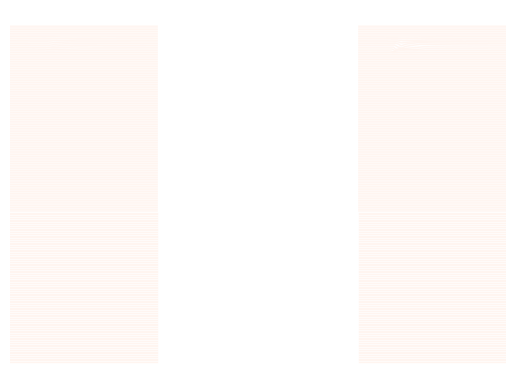

In [ ]:
tempgen = mr.load_recordings('/media/ubuntu/sda/Spike_Sorting/paper_architecture/02_simulation_data/02_Neuropixel_384_channels/data_generation/templates_300_neuropixels.h5')
# drifting templates can be plotted one at a time
mr.plot_templates(tempgen, template_ids=0, drifting=False, cmap='Reds', )